In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots

df = pd.read_csv('Data/drug_sales.csv')

df['date'] = pd.to_datetime(df['date'])

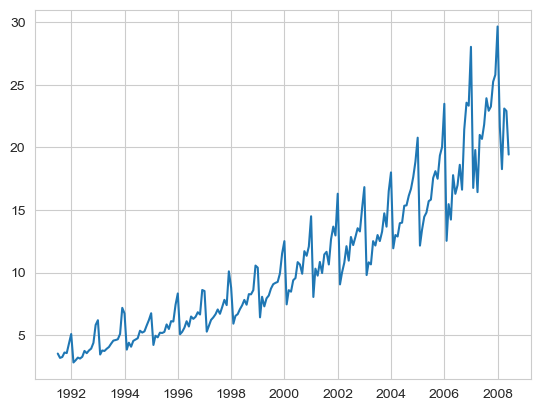

In [78]:
plt.plot(df.date, df.value)

plt.show()

In [79]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.value)
print(f'd value = {result[1]}')

d value = 1.0


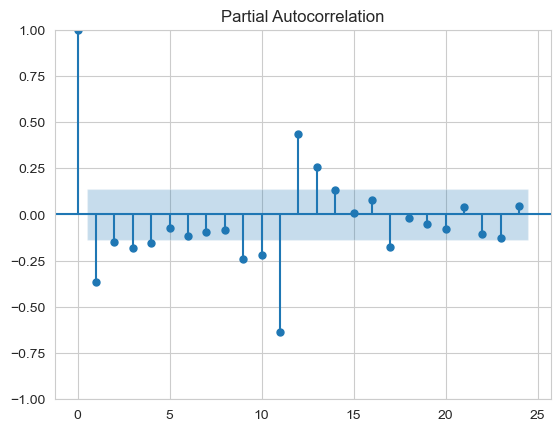

In [80]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(df.value.diff().dropna())

plt.show()

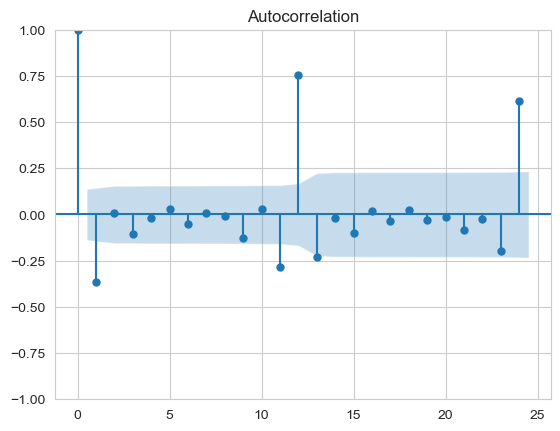

In [81]:
plot_acf(df.value.diff().dropna())

plt.show()

In [96]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df.value, order=(1, 1, 2))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  204
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -424.570
Date:                Mon, 26 Aug 2024   AIC                            857.140
Time:                        03:47:14   BIC                            870.393
Sample:                             0   HQIC                           862.502
                                - 204                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4178      0.356      1.174      0.240      -0.280       1.115
ma.L1         -0.9546      0.377     -2.531      0.011      -1.694      -0.215
ma.L2          0.0969      0.272      0.356      0.7

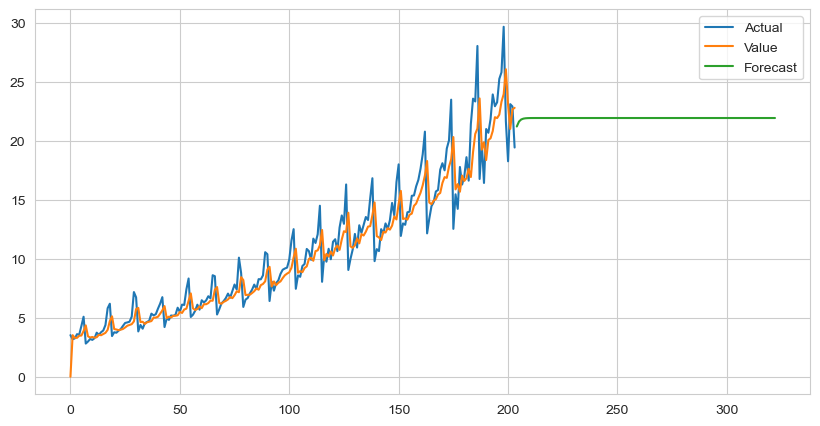

In [100]:
plt.subplots(figsize=(10, 5))

plt.plot(df.value)

model_fit.predict().plot()
model_fit.forecast(119).plot()

plt.legend(['Actual', 'Value', 'Forecast'])

plt.show()

In [85]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
